In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_q35 = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data_q35 = data_q35[data_q35['q35'].notna()]
data_q35 = data_q35[data_q35.columns[data_q35.isnull().mean() < 0.2]]

data_q35.columns[data_q35.isnull().any()]

for column in data_q35.columns:
    data_q35[column].fillna(data_q35[column].mode()[0], inplace=True)

median = data_q35.loc[data_q35['agecr'] < 200, 'agecr'].median()
data_q35["agecr"] = np.where(data_q35["agecr"] > 200, median,data_q35['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

x = data_q35.loc[:, data_q35.columns != 'q35']
y = data_q35['q35']

#m = sqrt(p)+1 features
nfeatures = data_q35.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

score = model4.score(x, y)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

df_feature = pd.DataFrame(zip(x.columns, model4.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])


df_feature[0:29]

feature  importance
97        q36    0.112007
98       q37b    0.045791
124        d2    0.035536
84      hours    0.025442
113       n19    0.021037
0          id    0.019502
79      iadls    0.019170
71       adls    0.018921
38      agecr    0.017737
26      agehh    0.016918
87     burden    0.015995
83        q25    0.015812
118      q48l    0.015117
18     ageirx    0.015027
56        q18    0.015000
30      agecg    0.014505
136   HH14WGT    0.013144
11        sc2    0.013090
137  IND14WGT    0.013069
63     q21avg    0.012595
123        d1    0.012464
88    burdcat    0.012326
41         q7    0.011708
68       q22d    0.011391
62       q21x    0.011085
130    income    0.010883
61        q21    0.010743
90         n9    0.010298
95        q38    0.009898

In [3]:
data_q35 = data_q35[['q18', 'hours', 'n19', 'adls', 'agecr', 'iadls', 'agecg', 'q7', 'q22d', 'income', 'n9', 'q38', 'q35']]

In [4]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data_q35 = data_q35.loc[data_q35['q18'].isin(lst)]
data_q35["q18"] = data_q35["q18"].astype(str)
data_q35["q18"] = data_q35["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
data_q35

q18  hours  n19  adls  agecr  iadls  agecg    q7  q22d  \
3               Aging   28.0  3.0   0.0   87.0    4.0     58  13.0   2.0   
5     MobilityProblem    0.5  2.0   4.0   80.0    6.0     37   6.0   2.0   
13          Arthritis   77.0  1.0   0.0   71.0    5.0     38  26.0   2.0   
24             Cancer   12.0  1.0   0.0   89.0    6.0     64  13.0   2.0   
36           Diabetes   21.0  3.0   2.0   81.0    7.0     47  13.0   2.0   
...               ...    ...  ...   ...    ...    ...    ...   ...   ...   
7969           Stroke   90.0  5.0   6.0   86.0    7.0     54   6.0   1.0   
7970        Arthritis   20.0  3.0   0.0   89.0    6.0     65  13.0   2.0   
7971      BrokenBones   40.0  3.0   4.0   66.0    5.0     47  13.0   2.0   
7973        Alzheimer   77.0  2.0   6.0   92.0    7.0     64  13.0   1.0   
7974     HeartDisease   10.0  6.0   0.0   82.0    5.0     47  13.0   2.0   

      income   n9  q38  q35  
3        2.0  2.0  2.0  2.0  
5        6.0  3.0  7.0  1.0  
13       2.0  2.0  1.0  1.0  
24       6.0  3.0  2.0  1.0  
36       3.0  2.0  2.0  2.0  
...      ...  ...  ...  ...  
7969     5.0  4.0  3.0  5.0  
7970    10.0  1.0  7.0  2.0  
7971     6.0  3.0  4.0  2.0  
7973     4.0  1.0  1.0  2.0  
7974     6.0  1.0  2.0  1.0  

[1267 rows x 13 columns]

In [5]:
lst2 = ['q7']
data_q35[lst2] = data_q35[lst2].astype(object)

In [6]:
data_q35 = data_q35[data_q35['n19'] != 7.0]
data_q35 = data_q35[data_q35['n19'] != 6.0]
data_q35 = data_q35[data_q35['q35'] != 7.0]
data_q35 = data_q35[data_q35['q35'] != 6.0]
data_q35 = data_q35[data_q35['q22d'] != 4.0]
data_q35 = data_q35[data_q35['n9'] != 5.0]
data_q35 = data_q35[data_q35['n9'] != 6.0]
data_q35 = data_q35[data_q35['q38'] != 5.0]
data_q35 = data_q35[data_q35['q38'] != 6.0]
data_q35 = data_q35[data_q35['income'] != 7.0]
data_q35 = data_q35[data_q35['income'] != 8.0]
data_q35 = data_q35[data_q35['income'] != 9.0]
data_q35 = data_q35[data_q35['income'] != 10.0]

In [7]:
data_q35.columns = ['illness', 'hours', 'diff_aff_care', 'adls', 'agecr', 'iadls', 'agecg', 'relationship', 'help_bathe', 'income', 'hospitalized', 'coord_care', 'phys_strain']
data_q35 = data_q35.reset_index(drop=True)

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_q35, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

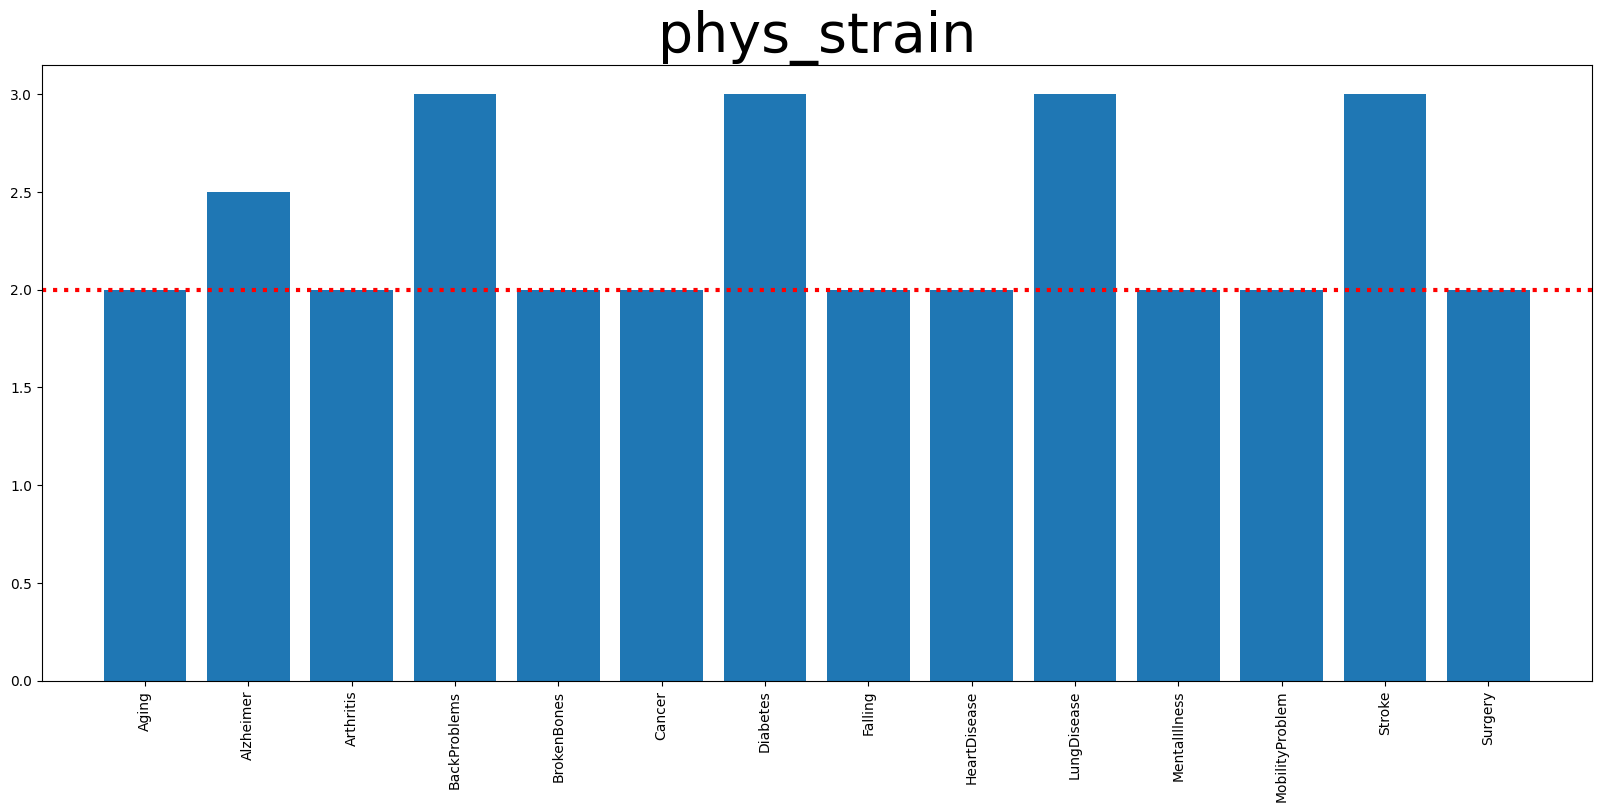

In [9]:
df_1 = data_q35.groupby(['illness'])['phys_strain'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['phys_strain'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['phys_strain'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "phys_strain", fontsize=40)
plt.plot()
plt.show()

In [10]:
data_q35.head()

illness  hours  diff_aff_care  adls  agecr  iadls  agecg  \
0            Aging   28.0            3.0   0.0   87.0    4.0     58   
1  MobilityProblem    0.5            2.0   4.0   80.0    6.0     37   
2        Arthritis   77.0            1.0   0.0   71.0    5.0     38   
3           Cancer   12.0            1.0   0.0   89.0    6.0     64   
4         Diabetes   21.0            3.0   2.0   81.0    7.0     47   

  relationship  help_bathe  income  hospitalized  coord_care  phys_strain  
0         13.0         2.0     2.0           2.0         2.0          2.0  
1          6.0         2.0     6.0           3.0         7.0          1.0  
2         26.0         2.0     2.0           2.0         1.0          1.0  
3         13.0         2.0     6.0           3.0         2.0          1.0  
4         13.0         2.0     3.0           2.0         2.0          2.0

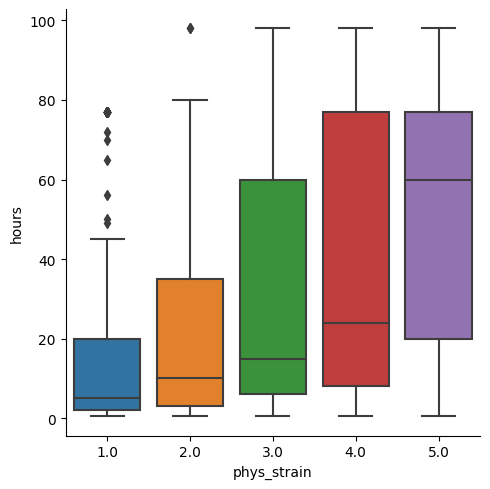

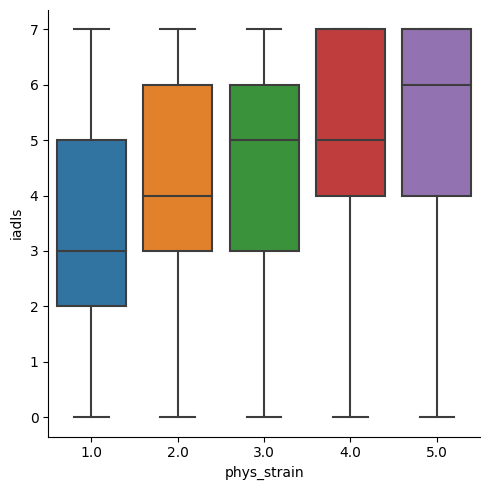

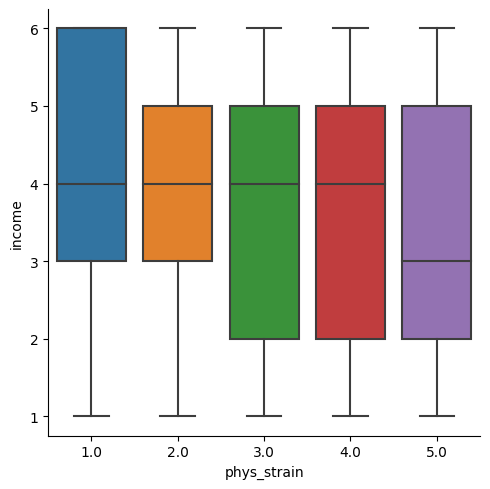

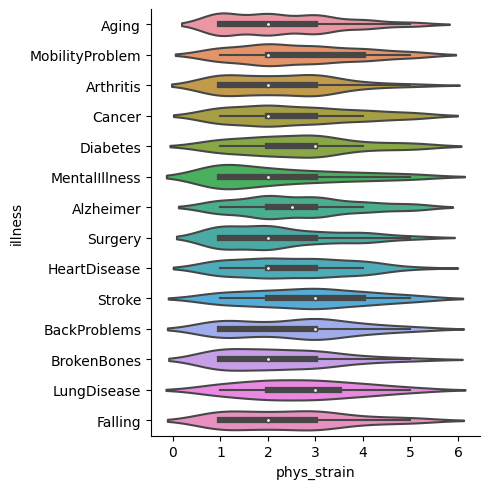

In [11]:
sns.catplot(x="phys_strain", y="hours", kind="box", data=data_q35)

sns.catplot(x="phys_strain", y="iadls", kind="box", data=data_q35)

sns.catplot(x="phys_strain", y="income", kind="box", data=data_q35)

sns.catplot(x="phys_strain", y="illness",
            kind="violin", data=data_q35)
